# Image Fundamentals



Images are basically 2D or 3D arrays where each element in the array represent a pixel value

## Grey scale Image

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

pd.set_option('display.max_colwidth', None)

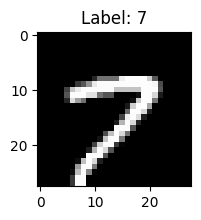

    0   1   2   3   4   5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21  22  23  24  25  26  27
0    0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0   0   0
1    0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0   0   0
2    0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0   0   0
3    0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0   0   0
4    0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0   0   0
5    0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0   0   0
6    0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0  

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
i = 123

plt.figure(figsize=(2,2))
plt.imshow(x_train[i], cmap='gray')
plt.title(f"Label: {y_train[i]}")
plt.show()
data = pd.DataFrame(x_train[i])
print(data.to_string())

## Black and White image


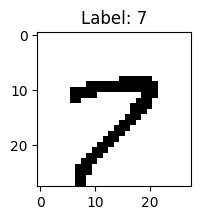

     0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27
0   255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255
1   255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255
2   255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255
3   255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255
4   255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255
5   255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255

In [ ]:
x_train[i] = np.where(x_train[i] > 128, 0, 255)

plt.figure(figsize=(2,2))
plt.imshow(x_train[i], cmap='gray')
plt.title(f"Label: {y_train[i]}")
plt.show()
data = pd.DataFrame(x_train[i])
print(data.to_string())




- Pixel
- Resoulution
- Channels

## RGB Images



*   Primary colors (Red, Green, Blue) and their combination
*   Python Imaging Library (PIL) or Pillow





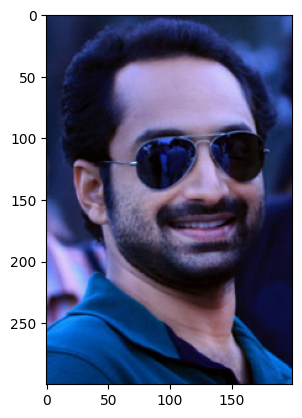

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image_1 = Image.open('actor_1.jpg')
plt.imshow(image_1)
plt.show()

In [ ]:
image_array = np.array(image_1)
print(image_array.shape)

(300, 200, 3)


array([[22, 23, 24, ..., 62, 63, 62],
       [22, 23, 24, ..., 65, 64, 63],
       [21, 22, 24, ..., 67, 67, 68],
       ...,
       [ 2,  0,  0, ...,  5,  4,  2],
       [ 2,  0,  0, ...,  5,  2,  2],
       [ 2,  1,  1, ...,  3,  3,  6]], dtype=uint8)
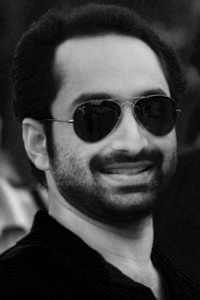

In [ ]:
image_array[:,:,0] # Red Channel

array([[ 39,  40,  41, ...,  96, 100, 102],
       [ 39,  40,  41, ...,  99, 101, 102],
       [ 38,  39,  41, ..., 100, 103, 104],
       ...,
       [ 70,  69,  67, ..., 100, 101,  99],
       [ 70,  69,  67, ..., 105, 102, 100],
       [ 70,  70,  68, ..., 104, 103, 103]], dtype=uint8)
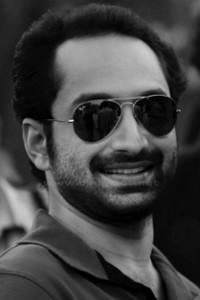

In [ ]:
image_array[:,:,1] # Green Channel

array([[ 82,  83,  85, ..., 185, 189, 190],
       [ 82,  83,  84, ..., 189, 192, 193],
       [ 81,  82,  84, ..., 193, 197, 198],
       ...,
       [151, 147, 145, ..., 206, 208, 202],
       [151, 147, 145, ..., 219, 214, 207],
       [151, 148, 146, ..., 222, 215, 210]], dtype=uint8)
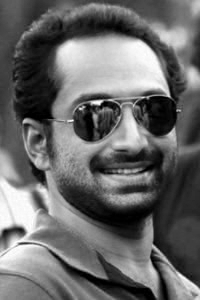

In [ ]:
image_array[:,:,2] # Blue Channel

## Histogram of Color Components

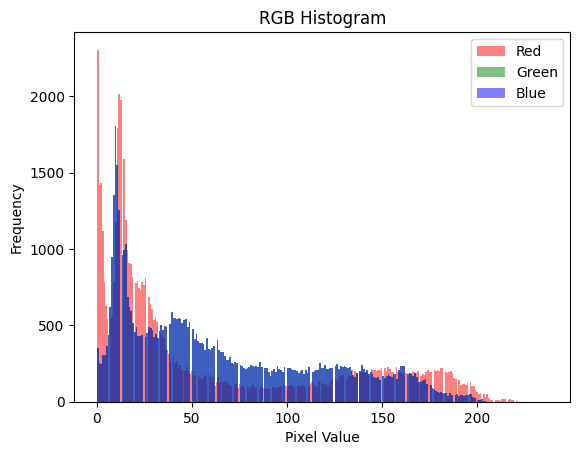

In [ ]:
plt.hist(image_array[:,:,0].flatten(), color='r', bins=256, alpha=0.5, label="Red")
plt.hist(image_array[:,:,1].flatten(), color='g', bins=256, alpha=0.5, label="Green")
plt.hist(image_array[:,:,1].flatten(), color='b', bins=256, alpha=0.5, label="Blue")
plt.title('RGB Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

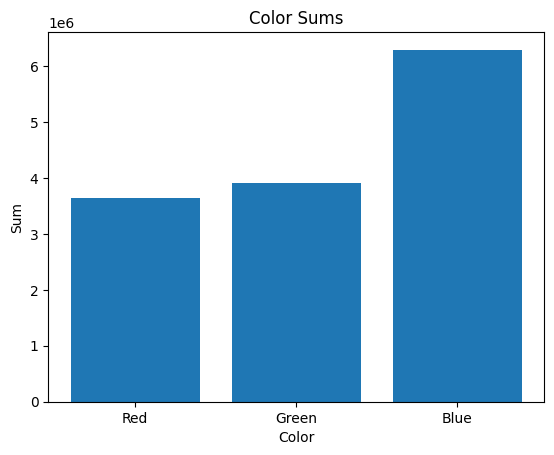

In [ ]:
color_sums = []
for i in range(3):
  color_sums.append(np.sum(image_array[:,:,i]))

plt.bar(['Red', 'Green', 'Blue'], color_sums)
plt.title('Color Sums')
plt.xlabel('Color')
plt.ylabel('Sum')
plt.show()

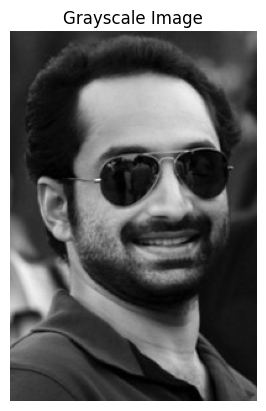

In [ ]:
# Convert to grayscale and display
gray_image = image_1.convert('L')
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

In [ ]:
grey_array = np.array(gray_image)
print(image_array.shape)
print(grey_array.shape)

(300, 200, 3)
(300, 200)


## Basic Image Transformations

## Resizing Images

In [2]:
import cv2
image = cv2.imread('actor_1.jpg')

resized_image = cv2.resize(image, (100, 150)) #(width, hight)
cv2.imwrite('resized_image.jpg', resized_image)

True

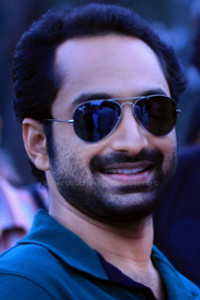

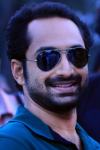

In [ ]:
from google.colab.patches import cv2_imshow
image = cv2.imread('actor_1.jpg')

cv2_imshow(image)
cv2_imshow(resized_image)

## Flipping Images

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print(a)


[[1 2 3]
 [4 5 6]]


In [ ]:
a[:, ::-1]

array([[3, 2, 1],
       [6, 5, 4]])

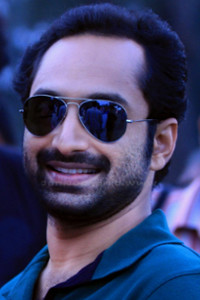

In [ ]:
flipped_image = cv2.flip(image, 1)  # Horizontal flip

cv2_imshow(flipped_image)

array([[ 39,  40,  41, ...,  96,  99, 100],
       [ 39,  40,  41, ...,  99, 100, 101],
       [ 38,  39,  41, ..., 101, 103, 104],
       ...,
       [ 59,  57,  56, ...,  84,  84,  82],
       [ 59,  57,  56, ...,  88,  85,  83],
       [ 59,  58,  57, ...,  87,  86,  86]], dtype=uint8)
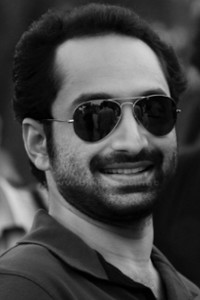

In [ ]:
grey_array

array([[100,  99,  96, ...,  41,  40,  39],
       [101, 100,  99, ...,  41,  40,  39],
       [104, 103, 101, ...,  41,  39,  38],
       ...,
       [ 82,  84,  84, ...,  56,  57,  59],
       [ 83,  85,  88, ...,  56,  57,  59],
       [ 86,  86,  87, ...,  57,  58,  59]], dtype=uint8)
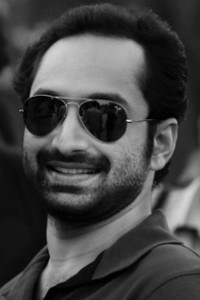

In [ ]:
grey_array[:, ::-1]

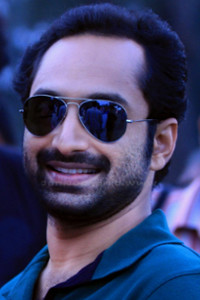

In [ ]:
cv2_imshow(image[:,::-1,:]) #Flipped horizontally with indexing

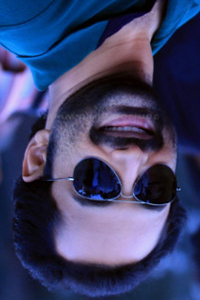

In [ ]:
cv2_imshow(image[::-1,:,:]) #Flipped vertically with indexing

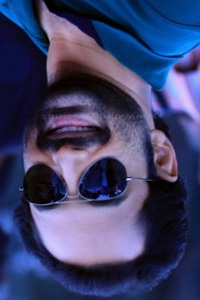

In [ ]:
cv2_imshow(image[::-1,::-1,:]) #Flipped horizontally & vertically with indexing

## Rotating Images

In [ ]:
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))

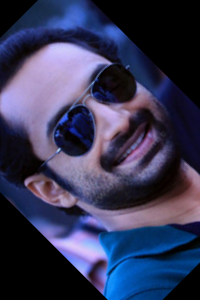

In [ ]:
cv2_imshow(rotated_image)

## Cropping Images

In [ ]:
cropped_image = image[50:200, 100:300]

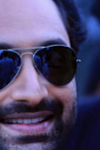

In [ ]:
cv2_imshow(cropped_image)

## Shrinking Image

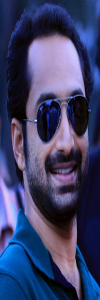

In [ ]:
cv2_imshow(image[::,::2,:])

## Insight into Convolution



*   Dot product
*   1D convolution





https://jackschaedler.github.io/circles-sines-signals/

In [ ]:
array1 = np.array([1, 2, 3, 4])
array2 = np.array([2, 1,])
convolved_array = np.convolve(array1, array2)

In [ ]:
convolved_array

array([ 2,  5,  8, 11,  4])

$$(f * g)[n]=\sum_{k=-\infty}^{\infty} f[k] g[n-k] \nonumber$$

In [ ]:
def generate_sine_array(size=100):
  random_array = np.random.rand(size)
  center = size // 2
  sine_wave = np.sin(np.linspace(-np.pi, np.pi, 20))
  start_index = center - len(sine_wave) // 2
  end_index = start_index + len(sine_wave)
  random_array[start_index:end_index] = sine_wave
  return random_array

In [ ]:
def generate_zero_sine_array(size=100):
  zero_array = np.zeros(size)
  center = size // 2
  sine_wave = np.sin(np.linspace(-np.pi, np.pi, 20))
  start_index = center - len(sine_wave) // 2
  end_index = start_index + len(sine_wave)
  zero_array[start_index:end_index] = sine_wave
  return zero_array

In [ ]:
sine_array = generate_sine_array()
zero_sine_array = generate_zero_sine_array()
convolved_array_2 = np.convolve(sine_array, zero_sine_array, mode='same')

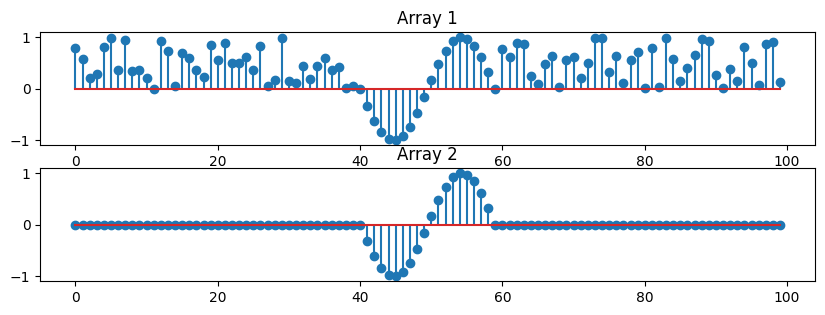

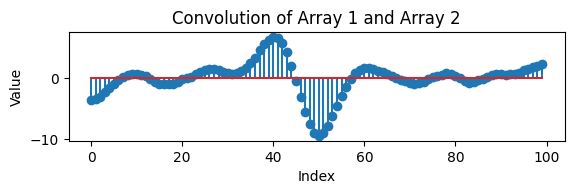

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(3, 1, 1)
plt.stem(sine_array)
plt.title('Array 1')

plt.subplot(3, 1, 2)
plt.stem(zero_sine_array)
plt.title('Array 2')
plt.show()

plt.subplot(3, 1, 3)
plt.stem(convolved_array_2)
plt.title('Convolution of Array 1 and Array 2')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

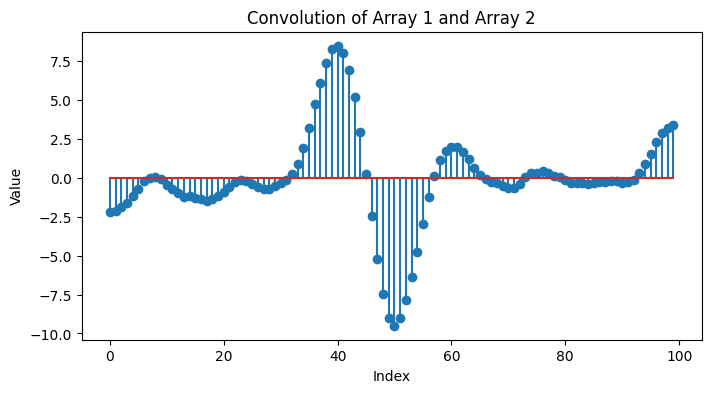

https://wandb.ai/ayush-thakur/dl-question-bank/reports/Intuitive-understanding-of-1D-2D-and-3D-convolutions-in-convolutional-neural-networks---VmlldzoxOTk2MDA

## 2D Convolution Intuition

In [ ]:
from scipy import signal

In [ ]:
img=np.array([(1, 0, 0, 0, 0, 1),
              (0, 1, 0, 0, 1, 0),
              (0, 0, 1, 1, 0, 0),
              (0, 0, 1, 1, 0, 0),
              (0, 1, 0, 0, 1, 0),
              (1, 0, 0, 0, 0, 1)])

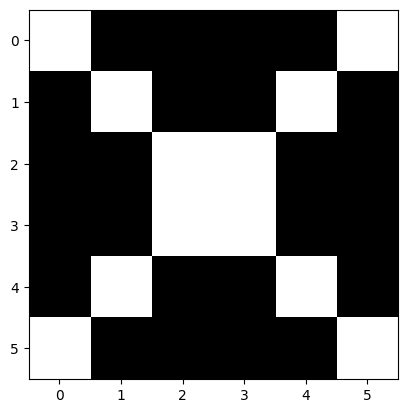

In [ ]:
plt.imshow(img, cmap='gray')

In [ ]:
kernel1=np.array([(1, 0, 0),
                 (0, 1, 0),
                 (0, 0, 1)])

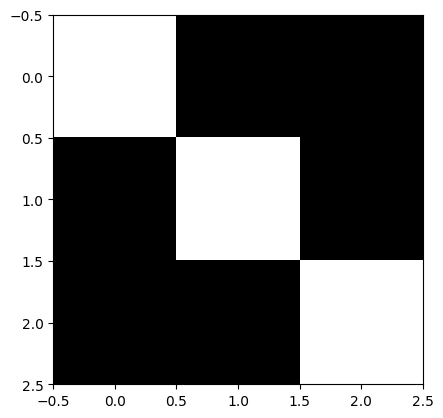

In [ ]:
plt.imshow(kernel1, cmap='gray')

In [ ]:
kernel2=np.array([(0, 0, 1),
                 (0, 1, 0),
                 (1, 0, 0)])

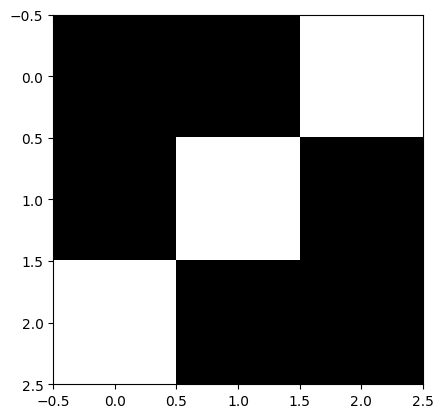

In [ ]:
plt.imshow(kernel2, cmap='gray')

In [ ]:
kernel3=np.array([(0, 1, 0),
                 (0, 1, 0),
                 (0, 1, 0)])

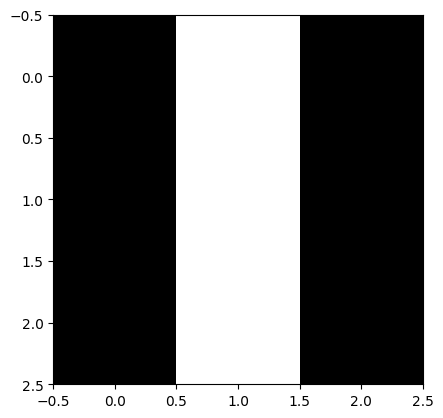

In [ ]:
plt.imshow(kernel3, cmap='gray')

In [ ]:
kernels = [kernel1, kernel2, kernel3]
outputs = []
for kernel in kernels:
    outputs.append(signal.convolve2d(img,kernel,'valid'))

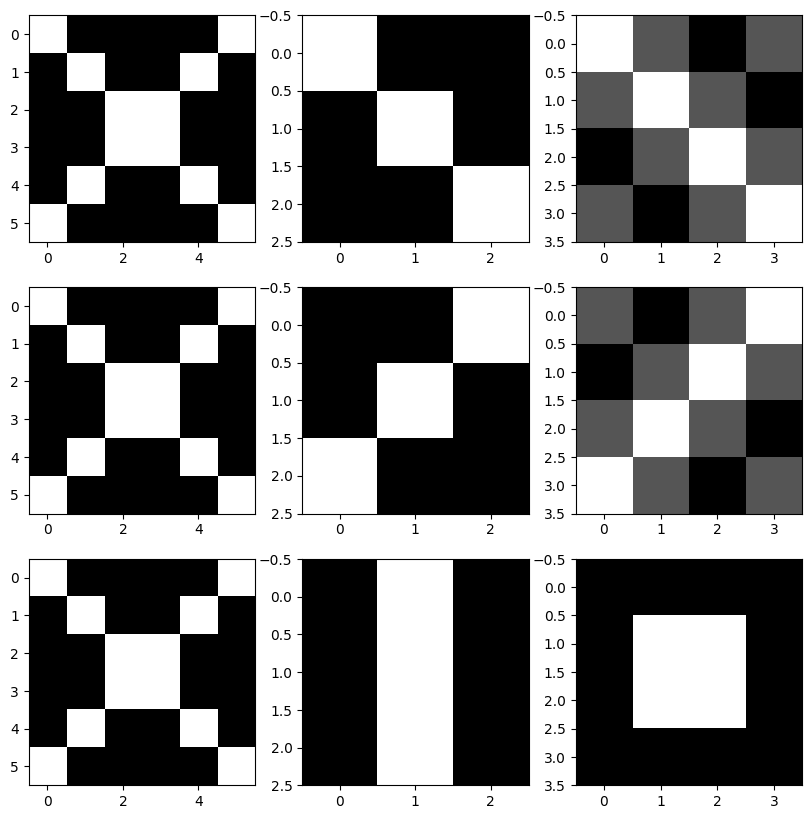

In [ ]:
fig = plt.figure(figsize=(10, 10))

plt.subplot(3, 3, 1)
plt.imshow(img, cmap='gray')
plt.subplot(3, 3, 2)
plt.imshow(kernel1, cmap='gray')
plt.subplot(3, 3, 3)
plt.imshow(outputs[0], cmap='gray')

plt.subplot(3, 3, 4)
plt.imshow(img, cmap='gray')
plt.subplot(3, 3, 5)
plt.imshow(kernel2, cmap='gray')
plt.subplot(3, 3, 6)
plt.imshow(outputs[1], cmap='gray')

plt.subplot(3, 3, 7)
plt.imshow(img, cmap='gray')
plt.subplot(3, 3, 8)
plt.imshow(kernel3, cmap='gray')
plt.subplot(3, 3, 9)
plt.imshow(outputs[2], cmap='gray')
plt.savefig('Convolution.png', dpi= 600)


In [ ]:
print(img)
for i in range(3):
  print(outputs[i])

[[1 0 0 0 0 1]
 [0 1 0 0 1 0]
 [0 0 1 1 0 0]
 [0 0 1 1 0 0]
 [0 1 0 0 1 0]
 [1 0 0 0 0 1]]
[[3 1 0 1]
 [1 3 1 0]
 [0 1 3 1]
 [1 0 1 3]]
[[1 0 1 3]
 [0 1 3 1]
 [1 3 1 0]
 [3 1 0 1]]
[[1 1 1 1]
 [1 2 2 1]
 [1 2 2 1]
 [1 1 1 1]]


## Precursor to Conv2D Layer in NN
https://towardsdatascience.com/conv2d-to-finally-understand-what-happens-in-the-forward-pass-1bbaafb0b148

array([[ 39,  40,  41, ...,  96,  99, 100],
       [ 39,  40,  41, ...,  99, 100, 101],
       [ 38,  39,  41, ..., 101, 103, 104],
       ...,
       [ 59,  57,  56, ...,  84,  84,  82],
       [ 59,  57,  56, ...,  88,  85,  83],
       [ 59,  58,  57, ...,  87,  86,  86]], dtype=uint8)
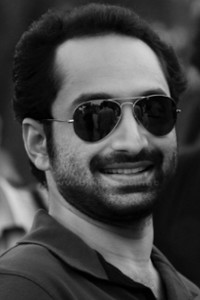

In [ ]:
grey_array

In [ ]:
edge_kernel = np.array([[-1, 1], [1, -1]])

In [ ]:
edge_image = signal.convolve2d(grey_array, edge_kernel, boundary='symm', mode='same')

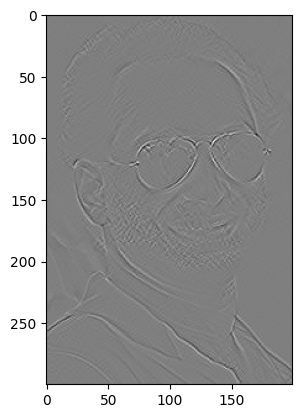

In [ ]:
plt.imshow(edge_image, cmap='gray')

In [ ]:
data_mean = edge_image.flatten().mean()

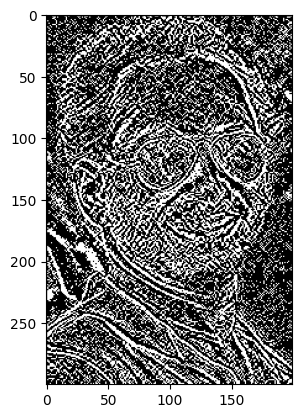

In [ ]:
plt.imshow(edge_image>data_mean, cmap='gray')

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True, False],
       [False, False, False, ..., False, False, False]])

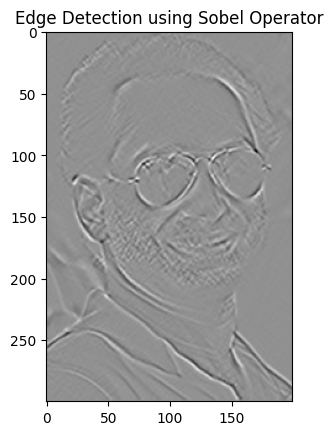

In [ ]:
edge_kernel_1 = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

edge_kernel_2 = np.array([[1, 2, 1],
                        [0, 0, 0],
                        [-1, -2, -1]])

edge_image = signal.convolve2d(grey_array, edge_kernel_1, boundary='symm', mode='same')
edge_image = signal.convolve2d(edge_image, edge_kernel_2, boundary='symm', mode='same')
plt.imshow(edge_image, cmap='gray')
plt.title('Edge Detection using Sobel Operator')
plt.show()

Please submit your feedback via https://futurepicx.com/feedback?id=2487AD91-5429-431C-902C-451AD5055F1A